In [21]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Patch

df_raw = pd.read_csv('estuary_cleaned.csv')
df = df_raw.drop_duplicates(subset='Site_Code') #We are only looking at statistics general to each site, so here we are removing rows with duplicate site codes

est_types = df['Estuary_type'].unique()
dist_classes = ['VL', 'L', 'M', 'H', 'VH'] #This is being manually set to retain order (while this could be achieved in the dataset itself through pandas, it would still require manually entering the order, and would be much less efficient)

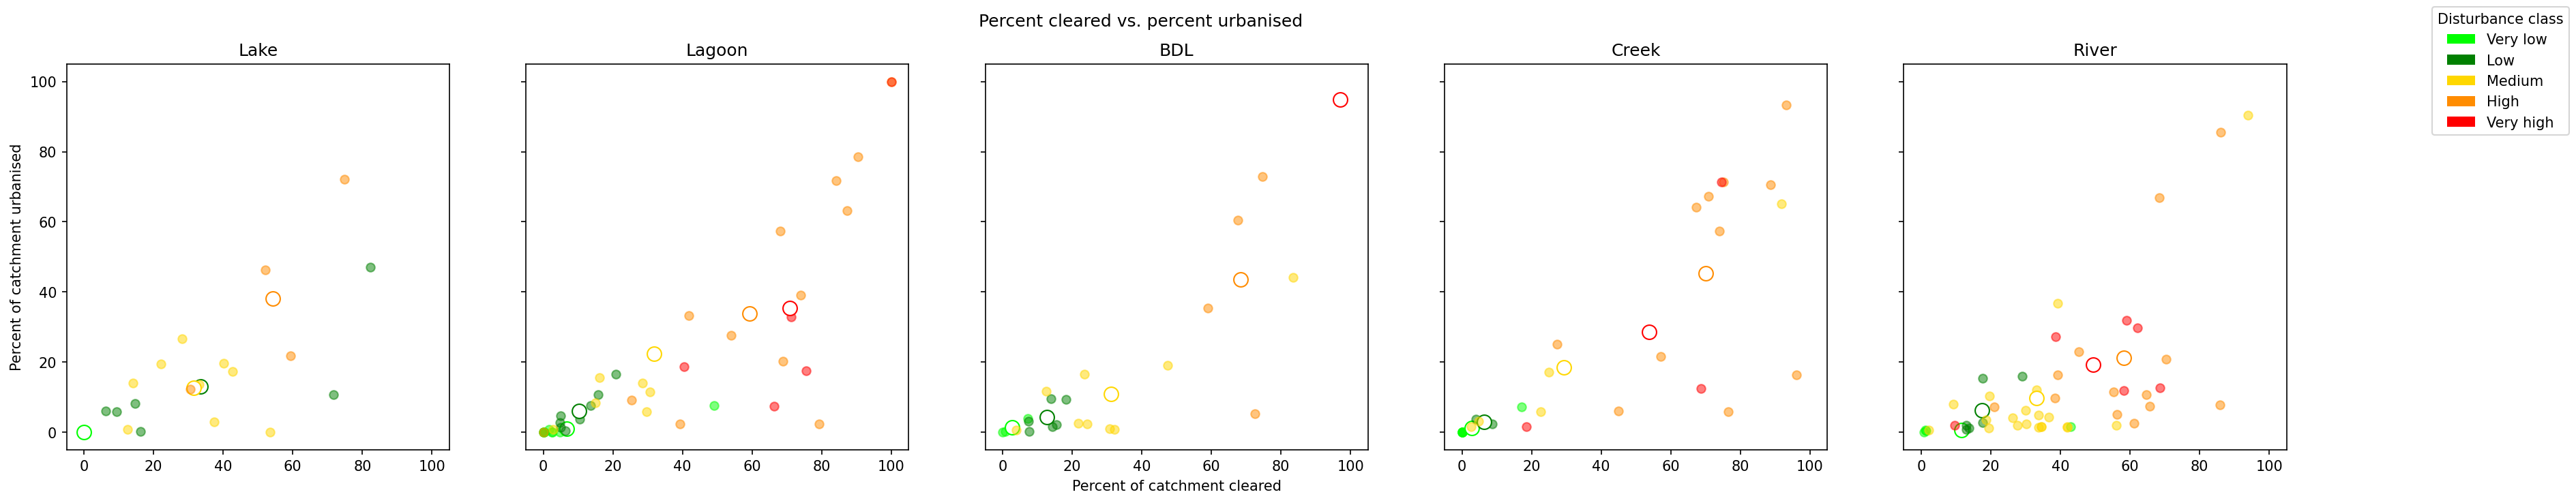

In [22]:
#Visualisation:

#Establishing subplots:
fig, axs = plt.subplots(1, 5, sharex=True, sharey=True,figsize =(28,5),dpi=150)
fig.suptitle('Percent cleared vs. percent urbanised')
axs[2].set_xlabel('Percent of catchment cleared')
axs[0].set_ylabel('Percent of catchment urbanised')
legend_elements = [Patch(facecolor='lime', label='Very low'),
                  Patch(facecolor='green', label='Low'),
                  Patch(facecolor='gold', label='Medium'),
                  Patch(facecolor='darkorange', label='High'),
                  Patch(facecolor='red', label='Very high')] #This must be manually set so that duplicate categories aren't included for each graph
fig.legend(handles=legend_elements,title='Disturbance class')

#Plotting each site type individually:
for est_type, num in zip(est_types, [0,1,2,3,4]): #Looping over each site type
  df_inloop = df[df['Estuary_type'] == est_type]
  for dist_class, colour in zip(dist_classes, ['lime', 'green', 'gold', 'darkorange', 'red']):
    df_by_class = df_inloop[df_inloop['Disturbance_class'] == dist_class]
    class_cleared = df_by_class.values[:, 25]
    class_urbanised = df_by_class.values[:, 26]
    axs[num].scatter(class_cleared, class_urbanised, c=colour, alpha=0.5)

    mean_class_cleared = df_by_class['percent_cleared'].mean()
    mean_class_urbanised = df_by_class['percent_urban'].mean()    
    axs[num].scatter(mean_class_cleared, mean_class_urbanised, s=100, c='white', edgecolors=colour, alpha=1)
  
  axs[num].set_title(est_type)
    
plt.savefig('figure.png')

In [23]:
#Summaries:
# For each catchment type, which disturbance class has the highest mean product of percent cleared and percent urbanised?

est_type_dict = {}

for est_type in est_types:
  df_by_type = df[df['Estuary_type'] == est_type]
  average_by_dist_class = {}
  for dist_class in dist_classes:
    df_by_class = df_by_type[df_by_type['Disturbance_class'] == dist_class]
    average_by_dist_class[dist_class] = (df_by_class['percent_cleared']*df_by_class['percent_urban']).mean()
  average_series = pd.Series(average_by_dist_class)
  est_type_dict[est_type] = str(average_series.idxmax()) + " (" + str(round(average_series.max()/100, 2)) + "%)"
    
for key in est_type_dict:
  print(key+": "+est_type_dict[key])

Lake: H (23.72%)
Lagoon: VH (29.86%)
BDL: VH (92.0%)
Creek: H (34.41%)
River: H (14.29%)
